In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv('iris.csv')

In [14]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
scaler = StandardScaler()

In [16]:
x =  df.iloc[:,:2]

In [17]:
y = df.iloc[:,4:]
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)

/nfs/cms/mtech22/deshmukh.shrirang/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 ,random_state= 110)

In [19]:
x_train_scaled = scaler.fit_transform(X_train)

In [20]:
x_test_scaled = scaler.transform(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [15]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
y_pred = knn.predict(x_test_scaled)
accuracy_score(y_test,y_pred)

0.8333333333333334

In [17]:
predict_acc = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train_scaled,y_train)
  knn.fit(x_train_scaled,y_train)
  y_pred = knn.predict(x_test_scaled)
  predict_acc.append(accuracy_score(y_test,y_pred))



In [18]:

print(predict_acc)

[0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.8333333333333334, 0.7666666666666667, 0.8, 0.7, 0.8333333333333334, 0.7666666666666667, 0.7666666666666667, 0.7333333333333333, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667]


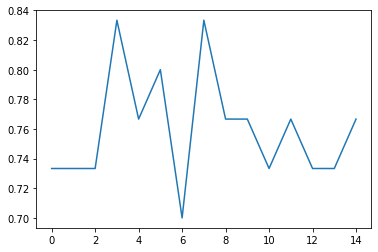

In [19]:
plt.plot(predict_acc)

In [20]:
a  = np.arange(start = x_train_scaled[:,0].min()-1 , stop = x_train_scaled[:,0].max()+1 , step = 0.01 )
b = np.arange(start = x_train_scaled[:,1].min()-1 , stop = x_train_scaled[:,1].max()+1 , step = 0.01 )

In [21]:
xx,yy = np.meshgrid(a,b)

In [22]:
xx.shape

(731, 625)

In [23]:
xx[0][0]

-2.8832306392433473

In [24]:
yy[0][0]

-3.1308872859742927

In [25]:
knn.predict(np.array([-2.855033750499903,-3.444246130917328]).reshape(1,2))

array([1])

In [32]:
input = np.array([xx.ravel(),yy.ravel()]).T
lables = knn.predict(input)

In [33]:
input

array([[-2.88323064, -3.13088729],
       [-2.87323064, -3.13088729],
       [-2.86323064, -3.13088729],
       ...,
       [ 3.33676936,  4.16911271],
       [ 3.34676936,  4.16911271],
       [ 3.35676936,  4.16911271]])

In [34]:
lables

array([1, 1, 1, ..., 2, 2, 2])

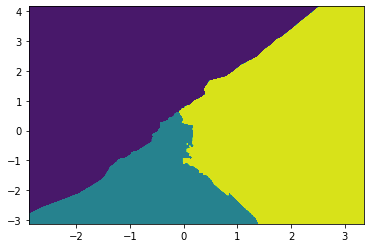

In [35]:
plt.contourf(xx,yy,lables.reshape(xx.shape))

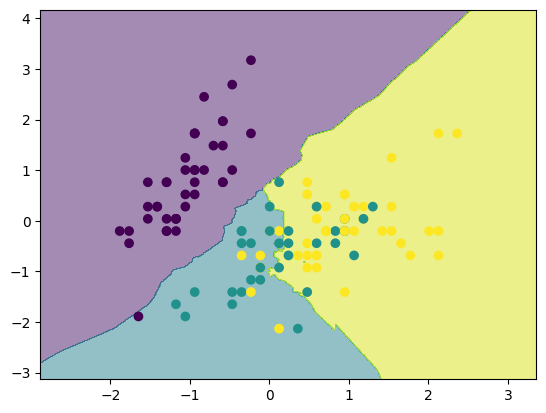

In [318]:
plt.contourf(xx,yy,lables.reshape(xx.shape),alpha = 0.5)
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1],c = y_train)